# LAB | BMI Survey 


## Part 1: Descriptive Analysis

## Problem Description

Overweight and obesity, measured by Body Mass Index (BMI), are increasing health concerns in Denmark and globally. This project analyzes BMI data from a Danish survey to provide an overview of BMI distributions and investigate potential factors influencing BMI, such as gender, age, and fast food consumption. The analysis aims to summarize and visualize the data using descriptive statistics and graphical methods.

---

## Instructions

- Complete each section below using Python and appropriate libraries (e.g., pandas, numpy, matplotlib, seaborn).
- Provide code, tables, and figures as needed.
- Write brief explanations for your findings after each analysis step.
- Do **not** include code in your final report; code should be submitted separately as an appendix.
- Ensure all figures and tables are clearly labeled and referenced in your explanations.

---

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [126]:
df = pd.read_csv(r"data\bmi1_data.csv", delimiter=";")

## Q1. Data Overview

**a) Short Description of the Data**

- List all variables in the dataset.
- Classify each variable as quantitative or categorical.
- State the number of observations.
- Check for missing values.


**Instructions:**  
- Summarize the dataset variables and their types.
- Report the number of observations and any missing values.

---

First few rows of the dataset:
   height  weight  gender  urbanity  fastfood
0     180      80       1         5      24.0
1     185      98       1         1       6.0
2     180      80       1         5       6.0
3     168      60       0         4      24.0
4     173      83       1         5      24.0

Missing values in each column:
height      0
weight      0
gender      0
urbanity    0
fastfood    0
dtype: int64

Number of duplicate rows:
0

Basic statistics for numerical columns:
           height      weight      gender    urbanity    fastfood
count  145.000000  145.000000  145.000000  145.000000  145.000000
mean   173.903448   76.737931    0.503448    3.668966   21.037241
std      9.328365   15.208286    0.501721    1.374647   40.321484
min    154.000000   50.000000    0.000000    1.000000    0.000000
25%    166.000000   65.000000    0.000000    3.000000    6.000000
50%    173.000000   75.000000    1.000000    4.000000    6.000000
75%    182.000000   87.000000    1.000000    5

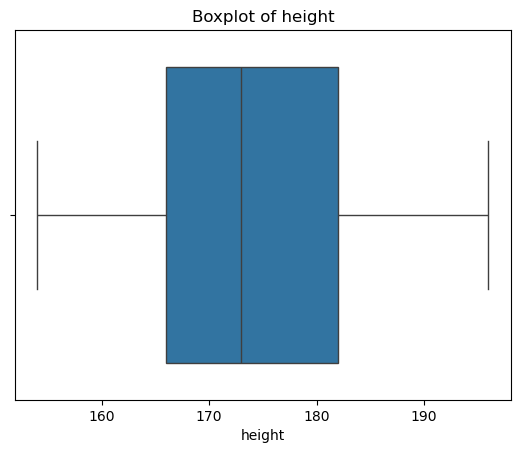

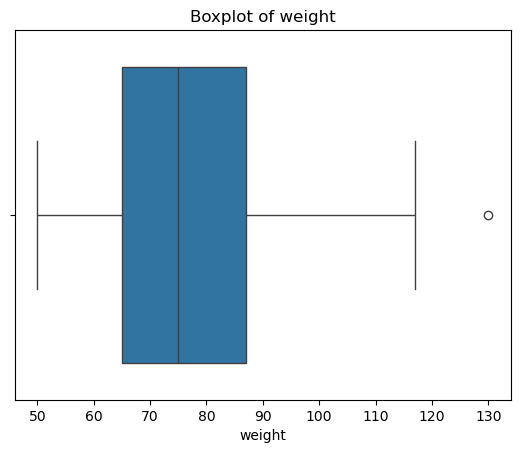

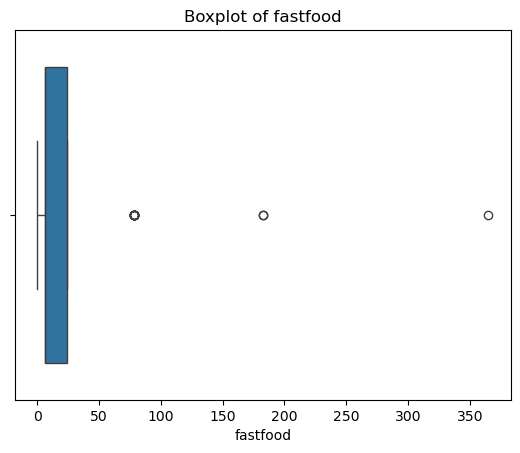


Cleaned dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    145 non-null    int64  
 1   weight    145 non-null    int64  
 2   gender    145 non-null    int64  
 3   urbanity  145 non-null    int64  
 4   fastfood  145 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 5.8 KB
None

First few rows of the cleaned dataset:
   height  weight  gender  urbanity  fastfood
0     180      80       1         5      24.0
1     185      98       1         1       6.0
2     180      80       1         5       6.0
3     168      60       0         4      24.0
4     173      83       1         5      24.0


In [127]:
### Insert your Answer Here ###
# 1. Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 3. Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# 4. Get basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
print(df.describe())

# 5. Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# 6. Check for unique values in categorical columns (e.g., 'gender', 'urbanity')
print("\nUnique values in 'gender':")
print(df['gender'].unique())
print("\nUnique values in 'urbanity':")
print(df['urbanity'].unique())

# 7. Handle missing values (if any)
# Example: Fill missing values in 'fastfood' with the median
if df['fastfood'].isnull().sum() > 0:
    df['fastfood'].fillna(df['fastfood'].median(), inplace=True)

# 8. Remove duplicate rows (if any)
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

# 9. Check for outliers in numerical columns using boxplots
import matplotlib.pyplot as plt
numerical_columns = ['height', 'weight', 'fastfood']
for col in numerical_columns:
    plt.figure()
    plt.title(f"Boxplot of {col}")
    sns.boxplot(x=df[col])
    plt.show()

# 10. Handle outliers (if necessary)
# Example: Remove rows with extreme outliers in 'fastfood' using the IQR rule
Q1 = df['fastfood'].quantile(0.25)
Q3 = df['fastfood'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outlier = df[(df['fastfood'] >= lower_bound) & (df['fastfood'] <= upper_bound)]

# 11. Verify the cleaned dataset
print("\nCleaned dataset summary:")
print(df.info())
print("\nFirst few rows of the cleaned dataset:")
print(df.head())


## 2. Calculating BMI

- Compute BMI for each respondent using the formula:

  $$\text{BMI} = \frac{\text{weight (kg)}}{\left[\text{height (m)}\right]^2}$$

- Add BMI as a new column to the dataset.

---


In [128]:
def calc_bmi(df):
    """
    Add new bmi column to df

    Input df including weight and height column

    Output: BMI column added
    """
    df["BMI"] = round(df["weight"] / (df["height"]/100)**2,2)
    return df

calc_bmi(df)

,height,weight,gender,urbanity,fastfood,BMI
0,180,80,1,5,24.0,24.69
1,185,98,1,1,6.0,28.63
2,180,80,1,5,6.0,24.69
3,168,60,0,4,24.0,21.26
4,173,83,1,5,24.0,27.73
...,...,...,...,...,...,...
140,162,69,0,2,6.0,26.29
141,174,73,1,5,182.5,24.11
142,170,70,0,4,6.0,24.22
143,178,56,0,5,1.0,17.67



## 3. Empirical Distribution of BMI

**b) Density Histogram of BMI Scores**

- Plot a density histogram of BMI.
- Describe the distribution: symmetry, skewness, possible negative values, and variation.

**Instructions:**  
- Comment on the shape and spread of the BMI distribution.

---


In [129]:
bmi_classification = {
    "Underweight": (None, 18.5),
    "Normal weight": (18.5, 24.9),
    "Moderately overweight": (25, 29.9),
    "Severely overweight (Obesity Class I)": (30, 34.9),
    "Severely overweight (Obesity Class II)": (35, 39.9),
    "Extremely severe obesity (Obesity Class III)": (40, None)
}

bmis = {category:value[1] for category, value in bmi_classification.items() if value[1] is not None}

c:\Users\Martijn\anaconda3\envs\datasci_env\lib\site-packages\seaborn\_stats\counting.py:179: RuntimeWarning: invalid value encountered in add
  center = edges[:-1] + width / 2
c:\Users\Martijn\anaconda3\envs\datasci_env\lib\site-packages\seaborn\distributions.py:474: RuntimeWarning: invalid value encountered in subtract
  edges = res[orient].to_numpy() - widths / 2


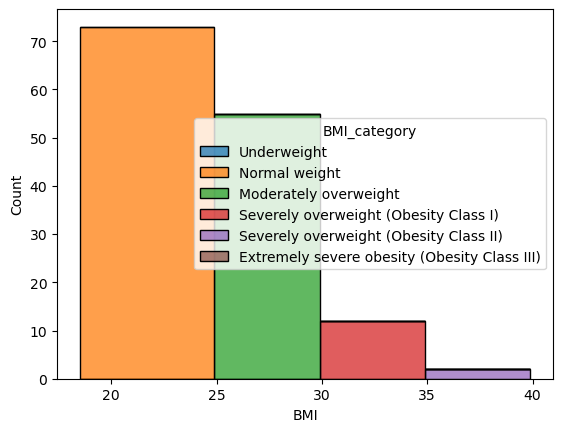

In [130]:
# Create labeled bins for BMI
bin_edges = [float('-inf')] + list(bmis.values()) + [float('inf')]
bin_labels = list(bmis.keys()) + ["Extremely severe obesity (Obesity Class III)"]

# Add a new column for BMI categories
df['BMI_category'] = pd.cut(df['BMI'], bins=bin_edges, labels=bin_labels, right=False)

# Plot the histogram with labeled bins
sns.histplot(df, x="BMI", bins=bin_edges, hue="BMI_category", multiple="stack")
plt.show()

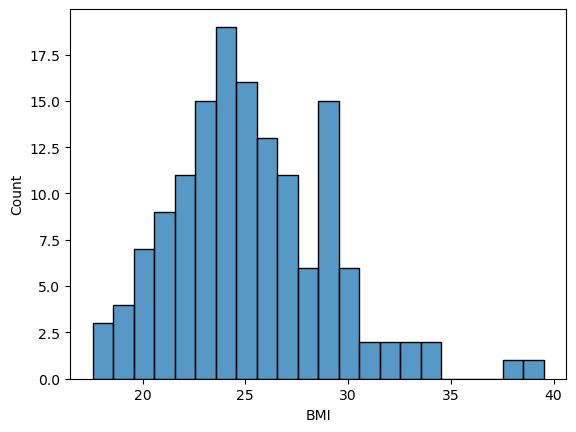

In [131]:
sns.histplot(df["BMI"], binwidth=1)
plt.show()

count    145.000000
mean      25.248069
std        3.832255
min       17.580000
25%       22.590000
50%       24.690000
75%       27.640000
max       39.520000
Name: BMI, dtype: float64
Skewness of BMI: 0.6718133812525674
Kurtosis of BMI: 0.9914343350599832
Are there any negative BMI values? False


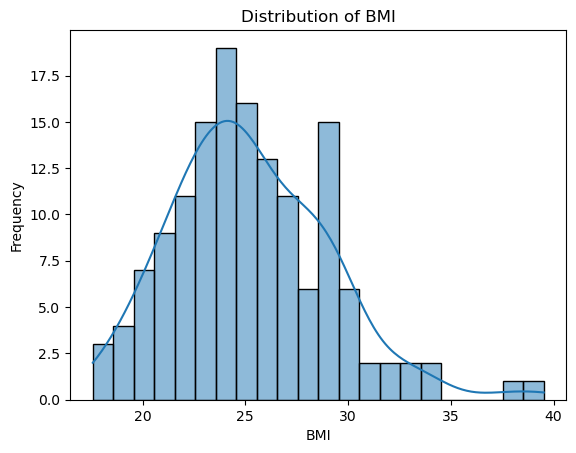

In [132]:
print(df["BMI"].describe())
print("="*20)

# Calculate skewness
skewness = df["BMI"].skew()
print(f"Skewness of BMI: {skewness}")

kurtosis = df["BMI"].kurtosis()
print(f"Kurtosis of BMI: {kurtosis}")

# Check for possible negative values
negative_values = (df["BMI"] < 0).any()
print(f"Are there any negative BMI values? {negative_values}")

# Visualize the distribution
sns.histplot(df["BMI"], kde=True, binwidth=1)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


## 4. Gender Subsets

**c) Separate Density Histograms for Women and Men**

- Create subsets for women and men.
- Plot density histograms for each group.
- Compare and describe the distributions.


**Instructions:**  
- Discuss any gender differences in the BMI distributions.

---


In [133]:
df_women = df[df["gender"] ==1]
df_men = df[df["gender"] !=1]

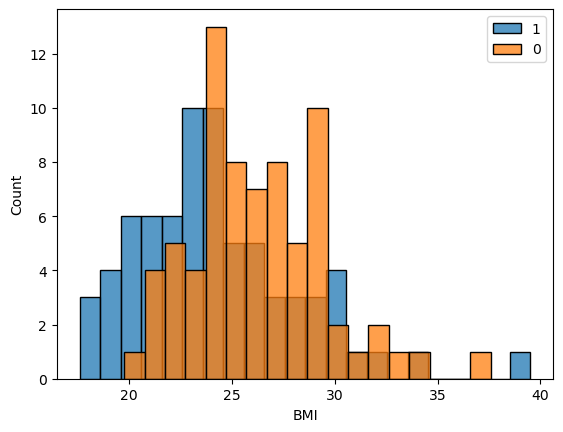

In [134]:
sns.histplot(df_men["BMI"], binwidth=1)
sns.histplot(df_women["BMI"], binwidth=1)
plt.legend(df["gender"].unique())
plt.show()


## 5. Boxplot by Gender

**d) Box Plot of BMI by Gender**

- Create a box plot of BMI scores grouped by gender.
- Describe the distribution, symmetry/skewness, differences, and outliers.

**Instructions:**  
- Interpret the box plot and compare distributions.

---


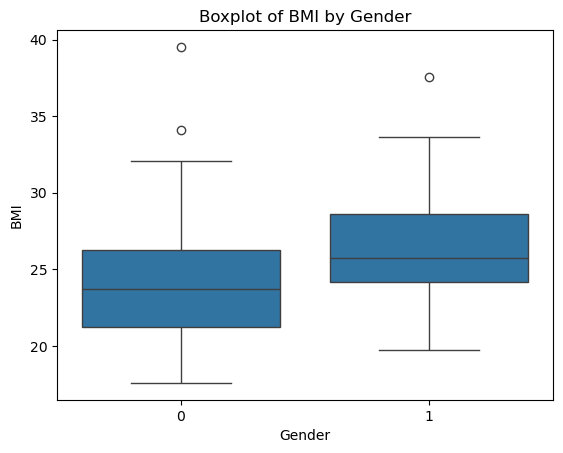

In [135]:
sns.boxplot(x="gender", y="BMI", data=df)
plt.title("Boxplot of BMI by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

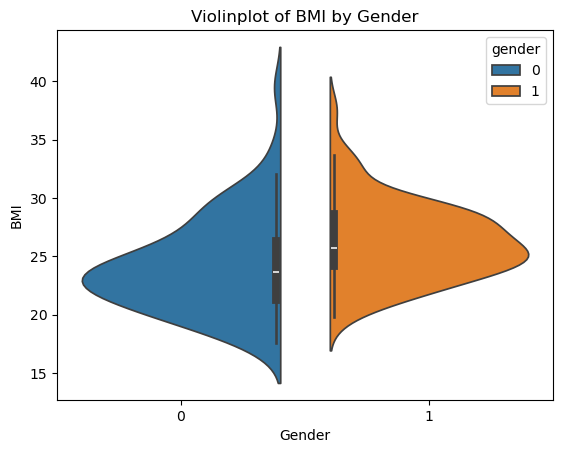

In [136]:
sns.violinplot(x="gender", y="BMI", data=df, hue="gender", split=True)
plt.title("Violinplot of BMI by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

## 6. Summary Statistics

**e) Key Summary Statistics for BMI**

- Calculate and report the following for everyone, women, and men:
  - Number of observations (n)
  - Sample mean (\(\bar{x}\))
  - Sample variance (\(s^2\))
  - Sample standard deviation (\(s\))
  - Lower quartile (Q1)
  - Median (Q2)
  - Upper quartile (Q3)

**Instructions:**  
- Present the summary statistics in a table.
- Discuss what additional insights are provided by the table compared to the box plot.

---


In [137]:
dfs = {"all":df, "men":df_men, "women":df_women}

summary_stats = [{
    "tpye":name,
    "n": len(frame["BMI"]),
    "mean": frame["BMI"].mean(),
    "variance": frame["BMI"].var(),
    "std_dev": frame["BMI"].std(),
    "Q1": frame["BMI"].quantile(0.25),
    "median": frame["BMI"].median(),
    "Q3": frame["BMI"].quantile(0.75)
    } for name, frame in dfs.items()]

summary_df = pd.DataFrame(summary_stats).set_index("tpye").transpose()
summary_df.round(2)

tpye,all,men,women
n,145.00,72.00,73.00
mean,25.25,24.22,26.27
variance,14.69,16.41,11.07
std_dev,3.83,4.05,3.33
Q1,22.59,21.26,24.15
median,24.69,23.69,25.73
Q3,27.64,26.29,28.63


## Part 2: Missing Values, Outliers, and Bivariate EDA

## 1. Missing Values

- List the number of missing values for each variable in the dataset.
- Choose and apply appropriate strategies for handling missing values (e.g., removal, imputation).
- Justify your chosen approach.
- Show the number of observations before and after handling missing values.

In [138]:
df.isna().sum()

height          0
weight          0
gender          0
urbanity        0
fastfood        0
BMI             0
BMI_category    0
dtype: int64

## 2. Outlier Detection and Handling

### a) Identifying Outliers

- Use visual (boxplots, scatterplots) and statistical methods (e.g., IQR rule, z-scores) to detect outliers in BMI, height, and weight.
- List any extreme values found and discuss whether they are plausible or likely errors.



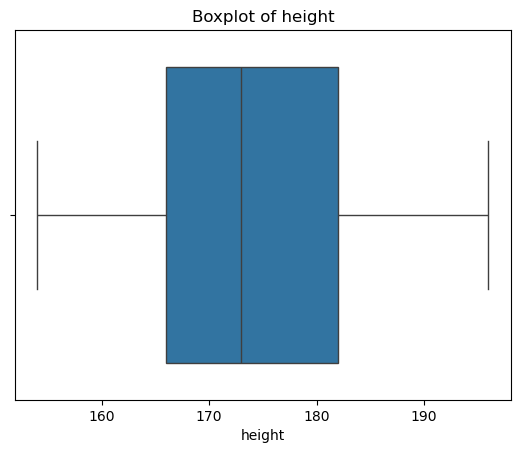

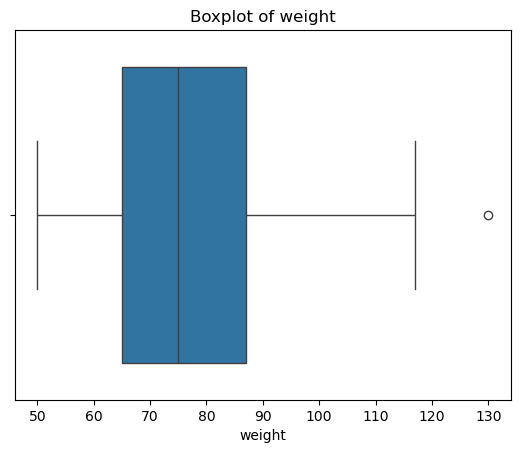

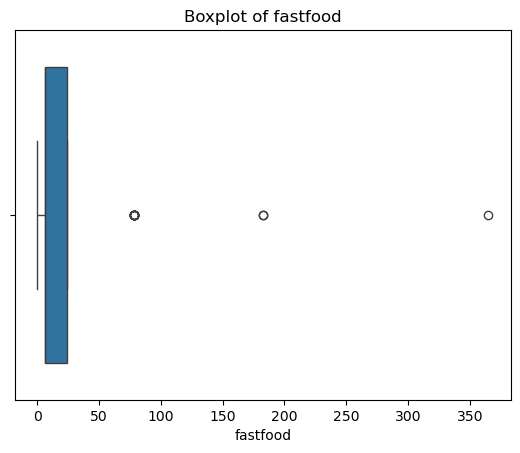

In [139]:
numerical_columns = ['height', 'weight', 'fastfood']
for col in numerical_columns:
    plt.figure()
    plt.title(f"Boxplot of {col}")
    sns.boxplot(x=df[col])
    plt.show()

In [140]:
def identify_outliers(df):
    numerical_columns = ['height', 'weight', 'fastfood']
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1 
        upper_bound = q3 + IQR * 1.5
        lower_bound = q1 - IQR * 1.5
        outlier = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
        print(f"outlier for {col}")
        display(outlier)
identify_outliers(df)

outlier for height


,height,weight,gender,urbanity,fastfood,BMI,BMI_category


outlier for weight


,height,weight,gender,urbanity,fastfood,BMI,BMI_category
73,186,130,1,4,78.2,37.58,Severely overweight (Obesity Class II)


outlier for fastfood


,height,weight,gender,urbanity,fastfood,BMI,BMI_category
26,185,82,1,5,78.2,23.96,Normal weight
38,172,65,1,4,78.2,21.97,Normal weight
48,183,109,1,3,365.0,32.55,Severely overweight (Obesity Class I)
50,182,79,1,5,78.2,23.85,Normal weight
63,187,78,1,5,78.2,22.31,Normal weight
73,186,130,1,4,78.2,37.58,Severely overweight (Obesity Class II)
101,169,55,0,3,78.2,19.26,Normal weight
103,176,65,1,5,78.2,20.98,Normal weight
105,195,95,1,4,78.2,24.98,Moderately overweight
120,182,82,1,5,78.2,24.76,Normal weight



### b) Handling Outliers

- Decide how to handle detected outliers (e.g., keep, remove, or correct).
- Justify your approach and show the effect on the dataset.



In [141]:
# keep cause realistic

## 3. Bivariate Exploratory Data Analysis (EDA)

### a) BMI and Fast Food Consumption

- Create a scatter plot of BMI vs. fast food consumption.
- Calculate and interpret the correlation coefficient.
- Comment on any patterns or associations observed.

In [142]:
df[["BMI", "fastfood"]].corr()

,BMI,fastfood
BMI,1.000000,0.153229
fastfood,0.153229,1.000000


<Axes: xlabel='fastfood', ylabel='BMI'>

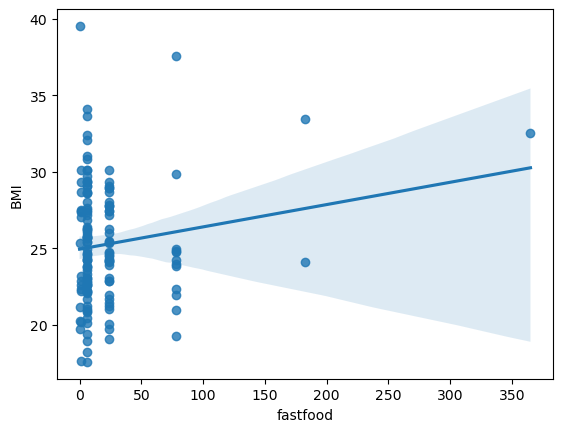

In [143]:
sns.regplot(df, x="fastfood", y="BMI")

### b) BMI by Gender

- Use boxplots or violin plots to compare BMI distributions between genders.
- Test for significant differences (e.g., t-test or Mann-Whitney U test).

In [144]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(df_men["BMI"], df_women["BMI"], equal_var=False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.3248709032119357
P-value: 0.0011350874099132677


In [145]:
summary_df

tpye,all,men,women
n,145.000000,72.000000,73.000000
mean,25.248069,24.216667,26.265342
variance,14.686175,16.414896,11.072431
std_dev,3.832255,4.051530,3.327526
Q1,22.590000,21.260000,24.150000
median,24.690000,23.690000,25.730000
Q3,27.640000,26.290000,28.630000


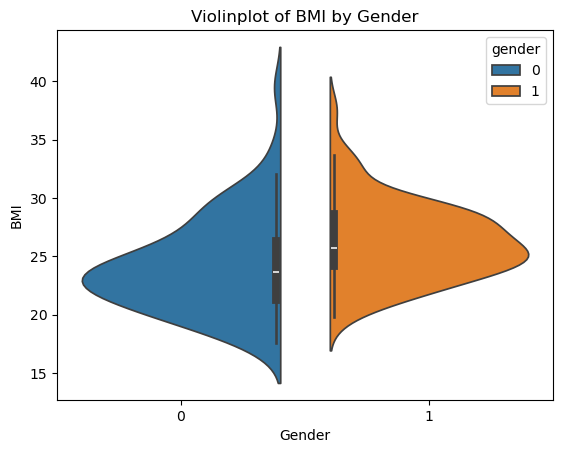

In [146]:
sns.violinplot(x="gender", y="BMI", data=df, hue="gender", split=True)
plt.title("Violinplot of BMI by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

### c) BMI by Urbanity

- Visualize BMI across different urbanity categories using boxplots or bar plots.
- Discuss any differences or trends.

<Axes: xlabel='urbanity', ylabel='BMI'>

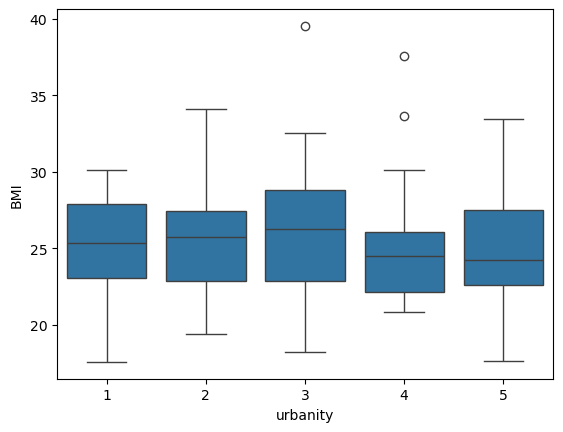

In [147]:
sns.boxplot(df, x="urbanity", y="BMI")

<Axes: xlabel='BMI'>

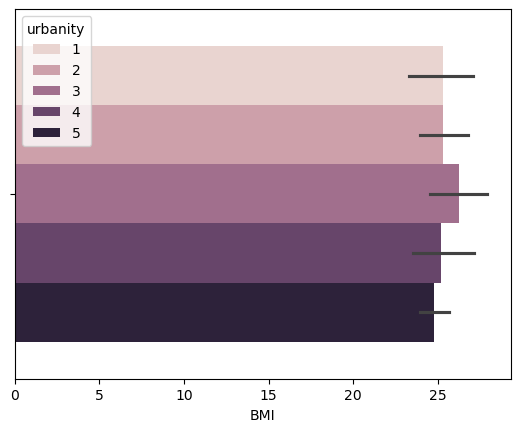

In [148]:
sns.barplot(df, x="BMI", hue="urbanity")

### d) Additional Bivariate Relationships

- Explore other pairs of variables as relevant (e.g., weight vs. height, fast food vs. gender).
- Use appropriate plots and statistics.

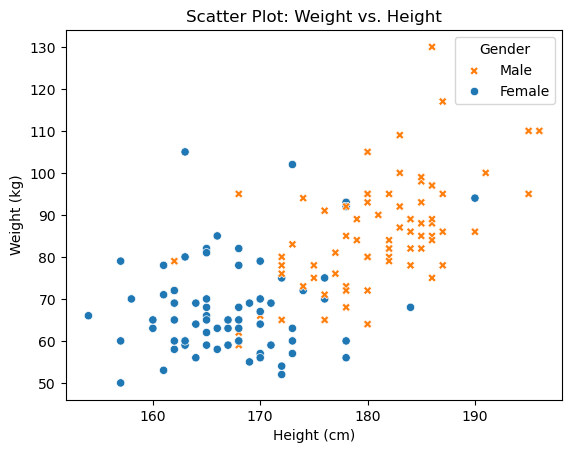

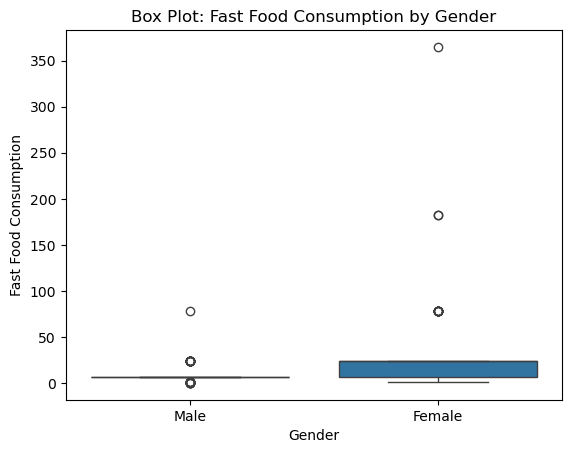

Correlation between Height and Weight: 0.66


In [152]:
# Scatter plot: Weight vs. Height
sns.scatterplot(data=df, x="height", y="weight", hue="gender", style="gender")
plt.title("Scatter Plot: Weight vs. Height")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()

# Box plot: Fast Food Consumption vs. Gender
sns.boxplot(data=df, x="gender", y="fastfood")
plt.title("Box Plot: Fast Food Consumption by Gender")
plt.xlabel("Gender")
plt.ylabel("Fast Food Consumption")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

# Correlation coefficient: Weight vs. Height
correlation = df["height"].corr(df["weight"])
print(f"Correlation between Height and Weight: {correlation:.2f}")

## 4. Summary

- Summarize the key findings from your missing value analysis, outlier handling, and bivariate EDA.
- Discuss how these steps improve the quality and reliability of your subsequent analyses.

In [150]:
## TODO
### Insert your Answer Here ###